In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')

In [3]:
demo_fruitnut['Organization Type'] = demo_fruitnut['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_berries['Organization Type'] = demo_berries['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_citrus['Organization Type'] = demo_citrus['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_vegetables['Organization Type'] = demo_vegetables['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")

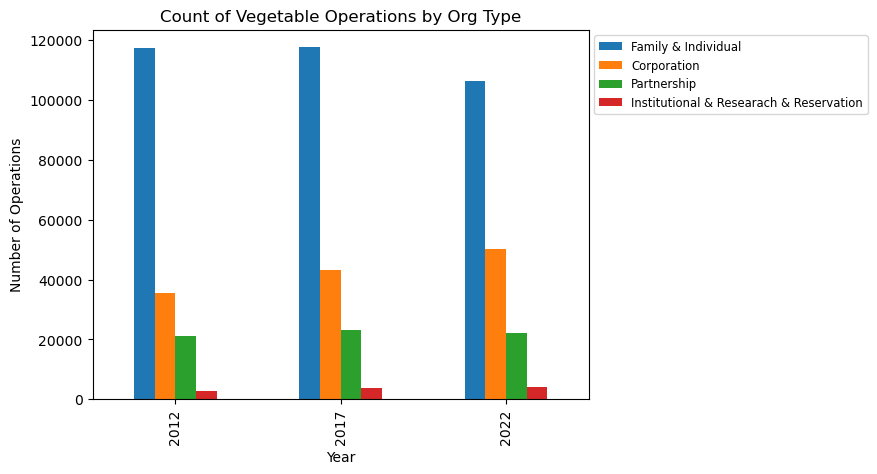

In [4]:
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (D)']
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (Z)']
demo_vegetables['Value'] = demo_vegetables['Value'].str.replace(',', '')
demo_vegetables['Value'] = pd.to_numeric(demo_vegetables.Value, downcast='integer').fillna(0)
demo_org_counts = demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION')
                & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_org_counts = demo_org_counts.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_org_counts = demo_org_counts[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
demo_org_counts_graph = demo_org_counts.plot(x = 'Year', y = list(
    demo_org_counts.columns.unique()[1:5]), 
                                            kind = "bar", title = "Count of Vegetable Operations by Org Type",
                                                      ylabel = "Number of Operations").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_org_counts_graph.savefig('demo_org_counts_graph.png', transparent=True, bbox_inches='tight')

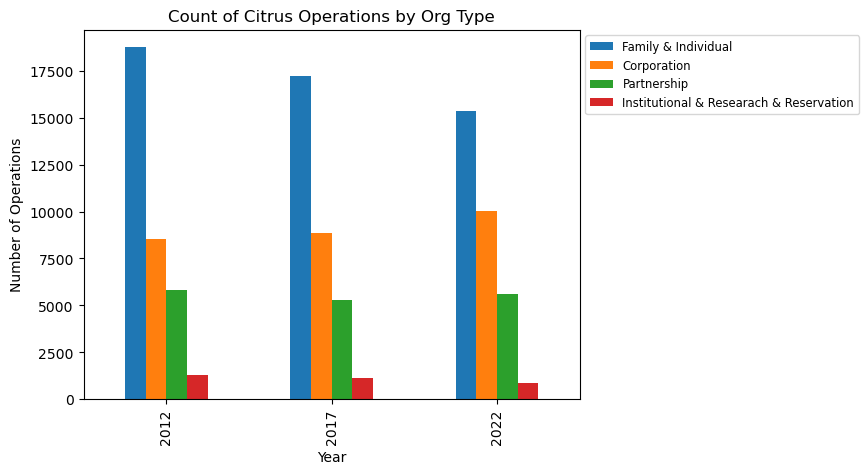

In [5]:
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (D)']
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (Z)']
demo_citrus['Value'] = demo_citrus['Value'].str.replace(',', '')
demo_citrus['Value'] = pd.to_numeric(demo_citrus.Value, downcast='integer').fillna(0)
demo_citrus_org_counts = demo_citrus.loc[(demo_citrus['Domain'] == 'ORGANIZATION')
                & (demo_citrus['Data Item'] == 'CITRUS TOTALS - OPERATIONS WITH AREA BEARING & NON-BEARING')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_citrus_org_counts = demo_citrus_org_counts.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_citrus_org_counts = demo_citrus_org_counts[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
demo_citrus_org_counts_graph = demo_citrus_org_counts.plot(x = 'Year', y = list(
    demo_citrus_org_counts.columns.unique()[1:5]), 
                                            kind = "bar", title = "Count of Citrus Operations by Org Type",
                                                      ylabel = "Number of Operations").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_citrus_org_counts_graph.savefig('demo_citrus_org_counts_graph.png', transparent=True, bbox_inches='tight')

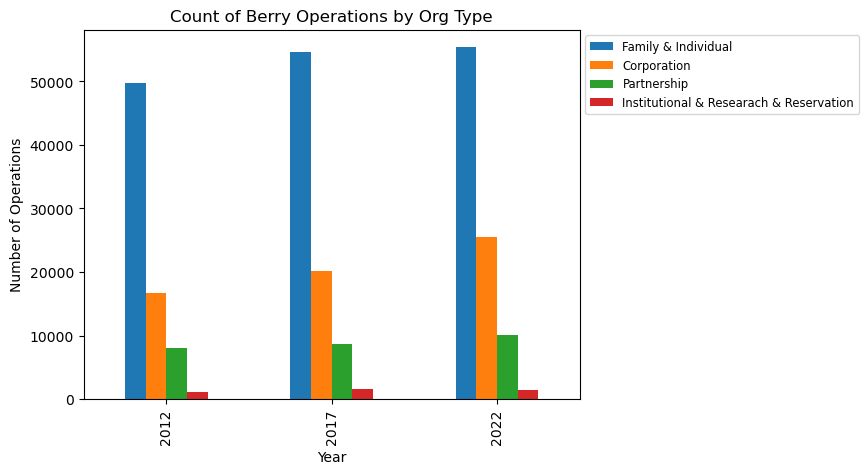

In [6]:
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (D)']
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (Z)']
demo_berries['Value'] = demo_berries['Value'].str.replace(',', '')
demo_berries['Value'] = pd.to_numeric(demo_berries.Value, downcast='integer').fillna(0)
demo_berries_org_counts = demo_berries.loc[(demo_berries['Domain'] == 'ORGANIZATION')
                & (demo_berries['Data Item'] == 'BERRY TOTALS - OPERATIONS WITH AREA GROWN')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_berries_org_counts = demo_berries_org_counts.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_berries_org_counts = demo_berries_org_counts[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
demo_berries_org_counts_graph = demo_berries_org_counts.plot(x = 'Year', y = list(
    demo_berries_org_counts.columns.unique()[1:5]), 
                                            kind = "bar", title = "Count of Berry Operations by Org Type",
                                                      ylabel = "Number of Operations").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_berries_org_counts_graph.savefig('demo_berries_org_counts_graph.png', transparent=True, bbox_inches='tight')

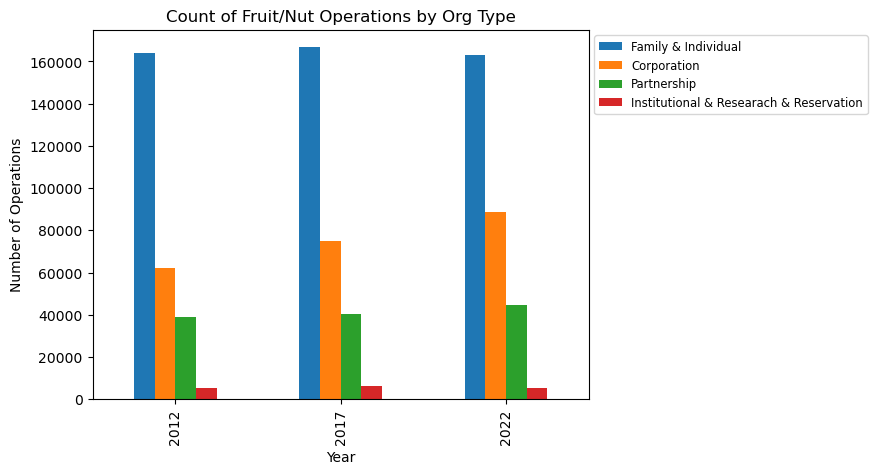

In [7]:
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (D)']
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (Z)']
demo_fruitnut['Value'] = demo_fruitnut['Value'].str.replace(',', '')
demo_fruitnut['Value'] = pd.to_numeric(demo_fruitnut.Value, downcast='integer').fillna(0)
demo_fruitnut_org_counts = demo_fruitnut.loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')
                & (demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_fruitnut_org_counts = demo_fruitnut_org_counts.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_fruitnut_org_counts = demo_fruitnut_org_counts[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
demo_fruitnut_org_counts_graph = demo_fruitnut_org_counts.plot(x = 'Year', y = list(
    demo_fruitnut_org_counts.columns.unique()[1:5]), 
                                            kind = "bar", title = "Count of Fruit/Nut Operations by Org Type",
                                                      ylabel = "Number of Operations").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_fruitnut_org_counts_graph.savefig('demo_fruitnut_org_counts_graph.png', transparent=True, bbox_inches='tight')